**Basic Univariate Visualization:** The following is a way to draw a simple plot of data points connected by lines. The plot is simple, but you can create a legend, labels, use colors, and mark specific points with different symbols, as explained in your book.

**NOTE**: Notice the first list of numbers are x-values, and the 2nd list of numbers are CORRESPONDING y-values. This is the trickiest part of creating a graph like this from a larger set of data (but also, probably the most useful).

**NOTE AGAIN**: Syntax--notice what you ALWAYS put in the first line (from...import...) AND that you need to write plt.show() at the end.

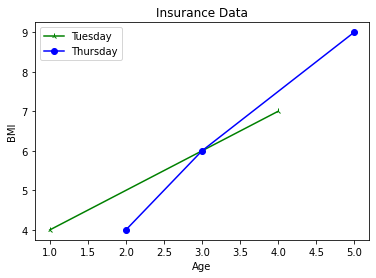

In [4]:
from matplotlib import pyplot as plt
plt.plot([1,3,4],[4,6,7], label='Tuesday', color='g', marker='2')
plt.plot([2,3,5],[4,6,9], label='Thursday', color='blue', marker='o')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Insurance Data')
plt.legend() # add legend, but make sure you have lines labeled
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Histographs** show the count (or number of instances) for each value of a variable. It can show the spread of ages (as in, how many people in the dataset are each age), BMI, and other numerical values. It can also help us know if the data is normally distributed (most of the data is close to the mean with only some far away).

Bins: Since this is a numerical variable, the bars are groupings of multiple values. You can change this by increasing or decreasing the number of "bins" (or bars). See your book for the standard number of bins, which is in your first line.

NOTE: The most challenging part of this graph is inputting text into the graph. The only way you figure this out is by playing around with it, so try different numbers and words. CHALLENGE: Do you understand how the code works for this?

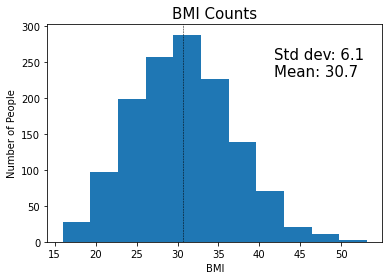

In [5]:
plt.hist(df.bmi, bins=int(round(df.bmi.count()**(1/3),0)))

# text in graph

text = 'Std dev: ' + str(round(df.bmi.std(), 2)) + '\n' + 'Mean: ' + str(round(df.bmi.mean(), 1))
plt.text(0.65, 0.7, text, fontsize = 15, transform=plt.gcf().transFigure)

plt.title("BMI Counts", fontsize=15)
plt.xlabel("BMI")
plt.ylabel("Number of People")
plt.axvline(df.bmi.mean(), color='k', linestyle='dashed', linewidth=0.5)
plt.savefig('BMI Counts', dpi=500)
plt.show()

**Kernel Smoothing** basically is just a way to see the pattern of your data in a histogram. (It's used for much more advanced statistics, but this will work for now). If you increase the number of bins for BMI's histogram, you'll see some are much higher and lower. Kernel Smoothing is a way to make a nice curve following the tops of the bins. This becomes important if the shape of the histogram isn't as clear.

The bottom part of the graph just shows how "densely" populated each part of the graph is with data points. You can see the area around the mean is very dark, meaning there are a ton more data points bundled closely together in that area, whereas they are a little more scattered about near the ends.

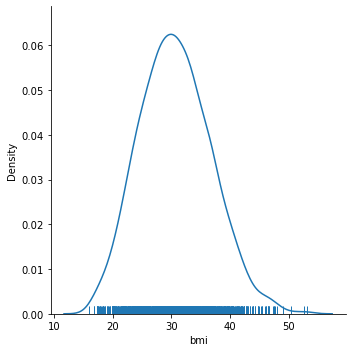

In [9]:
import seaborn as sns
ax = sns.displot(data=df, x='bmi', rug=True, kind='kde')

**BOXPLOTS**: Although they aren't used too often for reporting, they are a simple, quick tool for getting an idea of the shape of your data and finding outliers. Try this with a few of your numerical variables. What does it tell you about the data?

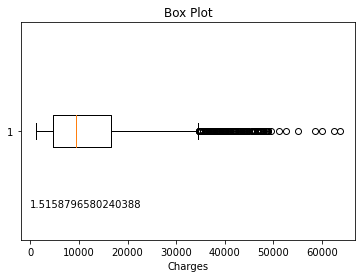

In [24]:
plt.boxplot(df.charges, vert=False)
plt.text(.2, .65, df.charges.skew())
plt.title('Box Plot')
plt.xlabel('Charges')
plt.show()

**Overlaying histograms** can be a useful tool in comparing variables, or more importantly, comparing two different values within one variable (based on another).

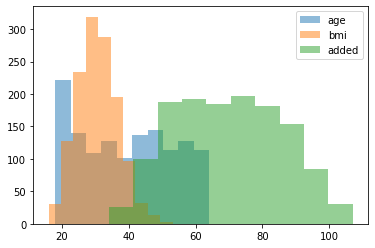

In [29]:
# Use alpha to create transparency between two histograms

plt.hist(df.age, alpha=0.5, label='age') # alpha makes the bins a little more transparent
plt.hist(df.bmi, alpha=0.5, label='bmi') # labels make sure something shows up in the legend!
plt.hist(df.age + df.bmi,alpha=0.5, label='added') # for sum of two previous variables, but won't work for 3rd
plt.legend()
plt.show()

This histogram actually splits the Smoker (categorical) variable in two: Yes or No.

What these overlaying histograms actually are showing are Charges (numerical), but the charges for each of the Smoker categories. Basically, you're looking at the charges for smokers, THEN the charges for non-smokers. They are overlaid so you can compare them.

You can add in a kernel smoother to get an idea of the shape of the data.

<AxesSubplot:xlabel='charges', ylabel='Count'>

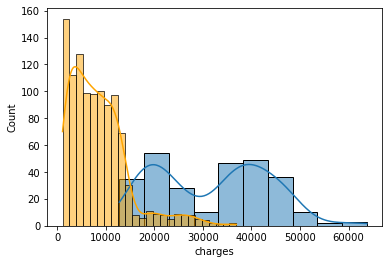

In [40]:
import seaborn as sns

sns.histplot(data=df[df['smoker']=='yes'], x='charges', kde=True)
sns.histplot(data=df[df['smoker']=='no'], x='charges', kde=True, color='orange')